In [1]:
import os
import pandas as pd
%matplotlib inline
from path import Path
from newsapi import NewsApiClient
from dotenv import load_dotenv

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
abs_path = Path(r'C:/Python/.env')
load_dotenv(abs_path) 
api_key=os.getenv('NEWS_API_KEY')

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines=newsapi.get_everything(
    q="bitcoin", language="en", sort_by="relevancy")

print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 4411


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Violet Blue',
 'title': "Twitter's Bitcoin hackers had almost limitless access",
 'description': 'On Wednesday, July 15, Twitter was the target of a very public hack attack that’s still sending shockwaves across the internet. In what is a major security breach for the company, a handful of the most-followed Twitter accounts belonging to some of the world’…',
 'url': 'https://www.engadget.com/twitter-bitcoin-scam-social-engineering-hack-access-193040357.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-07%2Fca68c900-c85d-11ea-b9df-6238180027a8&client=amp-blogside-v2&signature=9b0fbb183070e467429323ab75f41cbbe1c8dbc3',
 'publishedAt': '2020-07-17T19:30:40Z',
 'content': 'Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the accou

In [6]:
# Fetch the Ethereum news articles
ethereum_headlines=newsapi.get_everything(
    q="ethereum", language="en", sort_by="relevancy")

print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")
ethereum_headlines["articles"][0]

Total articles about Ethereum: 947


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Catherine Shu',
 'title': 'Singapore-based options trading platform Sparrow raises $3.5 million Series A',
 'description': 'Sparrow Exchange, a Bitcoin and Ethereum options trading platform based in Singapore, announced today it has raised $3.5 million in Series A funding. The round was led by HDR Group, the owner of cryptocurrency exchange BitMEX, with participation from Signum C…',
 'url': 'http://techcrunch.com/2020/06/23/singapore-based-options-trading-platform-sparrow-raises-3-5-million-series-a/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1193112376.jpg?w=600',
 'publishedAt': '2020-06-23T08:48:47Z',
 'content': 'Sparrow Exchange, a Bitcoin and Ethereum options trading platform based in Singapore, announced today it has raised $3.5 million in Series A funding.\r\nThe round was led by HDR Group, the owner of cry… [+833 chars]'}

In [7]:
# Create the Facebook Libra sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,text,compound,positive,negative,neutral
0,Just hackers burning up 0day like it’s a fire ...,0.0258,0.061,0.059,0.880
1,Most of these accounts tweeted some variant of...,0.0000,0.000,0.000,1.000
2,Reuters had previously reported the FBI would ...,0.0772,0.038,0.000,0.962
3,Our investigation and cooperation with law enf...,0.5994,0.149,0.000,0.851
4,Image copyrightAFP/REUTERSImage caption\r\n Ki...,0.1280,0.049,0.000,0.951


In [8]:
# Create the ethereum sentiment scores DataFrame

# Create the Facebook Libra sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,text,compound,positive,negative,neutral
0,"Sparrow Exchange, a Bitcoin and Ethereum optio...",0.0000,0.000,0.0,1.000
1,TL;DR: The Complete Cryptocurrency Investment ...,0.0000,0.000,0.0,1.000
2,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo...",0.5574,0.137,0.0,0.863
3,"When the inventor of AWS Lambda, Tim Wagner, a...",0.2263,0.053,0.0,0.947
4,I was perusing the crypto markets today and no...,0.7316,0.166,0.0,0.834


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.00000,20.000000,20.000000,20.000000
mean,-0.19796,0.030150,0.068050,0.901750
std,0.37825,0.040888,0.078697,0.088594
min,-0.86890,0.000000,0.000000,0.687000
25%,-0.45910,0.000000,0.000000,0.848250
50%,-0.07655,0.000000,0.060500,0.916000
75%,0.00645,0.052000,0.103750,0.971500
max,0.59940,0.149000,0.277000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,16.000000,16.000000,16.000000,16.000000
mean,0.293394,0.105625,0.042125,0.852250
std,0.409885,0.081672,0.048503,0.097511
min,-0.451900,0.000000,0.000000,0.660000
25%,0.000000,0.039750,0.000000,0.802500
50%,0.381550,0.119000,0.024500,0.855000
75%,0.647875,0.170000,0.078250,0.919000
max,0.731600,0.226000,0.130000,1.000000


In [14]:
#To get only content,title and description of article 
btc_text = []

for raw_text in bitcoin_headlines["articles"]:
    btc_text1 = raw_text["content"]
    btc_text2 = raw_text["title"]
    btc_text3 = raw_text["description"]
    btc_text.append(btc_text1)
    btc_text.append(btc_text2)
    btc_text.append(btc_text3)
btc_text      

['Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the account admin panels in the world. What would you do? You could grab high-valu… [+8860 chars]',
 "Twitter's Bitcoin hackers had almost limitless access",
 'On Wednesday, July 15, Twitter was the target of a very public hack attack that’s still sending shockwaves across the internet. In what is a major security breach for the company, a handful of the most-followed Twitter accounts belonging to some of the world’…',
 'Most of these accounts tweeted some variant of the same message: If someone were to send Bitcoin to the address specified in the tweets during a 30-minute window, the account owner would return doubl… [+3388 chars]',
 'Everything we know about the Twitter Bitcoin hack',
 'Author’s note: This story was first published on 7/16/2020, and last updated on the same day. Check the Latest Updates section for the most recent developments. \r\n Engadget\r\n Wh

In [15]:
eth_text = []

for raw_text in ethereum_headlines["articles"]:
    eth_text1 = raw_text["content"]
    eth_text2 = raw_text["title"]
    eth_text3 = raw_text["description"]
    eth_text.append(eth_text1)
    eth_text.append(eth_text2)
    eth_text.append(eth_text3)
eth_text   

['Sparrow Exchange, a Bitcoin and Ethereum options trading platform based in Singapore, announced today it has raised $3.5 million in Series A funding.\r\nThe round was led by HDR Group, the owner of cry… [+833 chars]',
 'Singapore-based options trading platform Sparrow raises $3.5 million Series A',
 'Sparrow Exchange, a Bitcoin and Ethereum options trading platform based in Singapore, announced today it has raised $3.5 million in Series A funding. The round was led by HDR Group, the owner of cryptocurrency exchange BitMEX, with participation from Signum C…',
 "TL;DR: The Complete Cryptocurrency Investment bundle is on sale for £19.21 as of June 25, saving you 94% on list price.\r\nIf we're to believe every plot point from the movie The Social Network, Mark Z… [+2756 chars]",
 'Learn how to invest in cryptocurrencies with this set of online classes',
 "TL;DR: The Complete Cryptocurrency Investment bundle is on sale for £19.21 as of June 25, saving you 94% on list price.\n\nIf we're to

### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amrita.kumari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Expand the default stopwords list if necessary
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [38]:
# Complete the tokenizer function
"""Tokenizes text."""
def tokenizer(text):    
    sw = set(stopwords.words('english'))  
    regex = re.compile("[^a-zA-Z ]")    # Create a list of the words
    re_clean = regex.sub('', text)    # Remove the punctuation
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]   # Lemmatize Words into root words          
    output = [word.lower() for word in lem if word.lower() not in sw]  # Convert the words to lowercase  # Remove the stop words          
    return tokens


In [ ]:
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    #words = list(filter(lambda w: w.lower(), words))
    words = [word.lower() for word in words]
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens

In [18]:
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = [word.lower() for word in words]
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens

In [23]:
# Convert bitcoin and ethereum article into str
bitcoin_str=str(btc_text)
ethereum_str=str(eth_text)

In [38]:
#print(set(tokenizer(bitcoin_str)))
btc_token_text = tokenizer(bitcoin_str)
btc_token_text

["'just",
 'hacker',
 'burning',
 '0day',
 'like',
 '’',
 'fire',
 'sale\\r\\nimagine',
 'getting',
 'key',
 'twitter',
 'kingdom',
 '--',
 'access',
 'account',
 'admin',
 'panel',
 'world',
 'would',
 'could',
 'grab',
 'high-valu…',
 '+8860',
 'char',
 'twitter',
 'bitcoin',
 'hacker',
 'almost',
 'limitless',
 'access',
 "'on",
 'wednesday',
 'july',
 '15',
 'twitter',
 'target',
 'public',
 'hack',
 'attack',
 '’',
 'still',
 'sending',
 'shockwaves',
 'across',
 'internet',
 'major',
 'security',
 'breach',
 'company',
 'handful',
 'most-followed',
 'twitter',
 'account',
 'belonging',
 'world',
 '’',
 "'most",
 'account',
 'tweeted',
 'variant',
 'message',
 'someone',
 'send',
 'bitcoin',
 'address',
 'specified',
 'tweet',
 '30-minute',
 'window',
 'account',
 'owner',
 'would',
 'return',
 'doubl…',
 '+3388',
 'char',
 "'everything",
 'know',
 'twitter',
 'bitcoin',
 'hack',
 "'author",
 '’',
 'note',
 'story',
 'first',
 'published',
 '7/16/2020',
 'last',
 'updated',
 'day'

In [41]:
#print(set(tokenizer(ethereum_str)))
eth_token_text=tokenizer(ethereum_str)
eth_token_text

["'sparrow",
 'exchange',
 'bitcoin',
 'ethereum',
 'option',
 'trading',
 'platform',
 'based',
 'singapore',
 'announced',
 'today',
 'raised',
 '3.5',
 'million',
 'series',
 'funding.\\r\\nthe',
 'round',
 'led',
 'hdr',
 'group',
 'owner',
 'cry…',
 '+833',
 'char',
 "'singapore-based",
 'option',
 'trading',
 'platform',
 'sparrow',
 'raise',
 '3.5',
 'million',
 'series',
 "'sparrow",
 'exchange',
 'bitcoin',
 'ethereum',
 'option',
 'trading',
 'platform',
 'based',
 'singapore',
 'announced',
 'today',
 'raised',
 '3.5',
 'million',
 'series',
 'funding',
 'round',
 'led',
 'hdr',
 'group',
 'owner',
 'cryptocurrency',
 'exchange',
 'bitmex',
 'participation',
 'signum',
 'c…',
 'tl',
 'dr',
 'complete',
 'cryptocurrency',
 'investment',
 'bundle',
 'sale',
 '£19.21',
 'june',
 '25',
 'saving',
 '94',
 'list',
 'price.\\r\\nif',
 "'re",
 'believe',
 'every',
 'plot',
 'point',
 'movie',
 'social',
 'network',
 'mark',
 'z…',
 '+2756',
 'char',
 "'learn",
 'invest',
 'cryptocur

In [ ]:
# Create a new tokens column for bitcoin

In [16]:
# Create a new tokens column for ethereum

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.3919,0.801,0.140,0.059,President Trump tweeted insults at Twitter aga...,"[President, Trump, tweeted, insult, Twitter, m..."
1,0.1779,0.961,0.000,0.039,After announcing that they were launching a ma...,"[announcing, launching, managed, blockchain, s..."
2,0.0000,1.000,0.000,0.000,Captain Kirk and neo-Dadaists. Repugnant marke...,"[Captain, Kirk, neo-Dadaists, Repugnant, marke..."
3,-0.8020,0.717,0.217,0.066,"So long as cryptocurrency exists, so too will ...","[long, cryptocurrency, exists, extraordinaryle..."
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin...","[thought, theft, 7,000, bitcoins, one, world, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [43]:
from collections import Counter
from nltk import ngrams


In [44]:
# Generate the Bitcoin N-grams where N=2
bitcoin_processed = tokenizer(bitcoin_str)
bitcoingrm_counts = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoingrm_counts))

{("'just", 'hacker'): 1, ('hacker', 'burning'): 1, ('burning', '0day'): 1, ('0day', 'like'): 1, ('like', '’'): 1, ('’', 'fire'): 1, ('fire', 'sale\\r\\nimagine'): 1, ('sale\\r\\nimagine', 'getting'): 1, ('getting', 'key'): 1, ('key', 'twitter'): 1, ('twitter', 'kingdom'): 1, ('kingdom', '--'): 1, ('--', 'access'): 1, ('access', 'account'): 1, ('account', 'admin'): 1, ('admin', 'panel'): 1, ('panel', 'world'): 1, ('world', 'would'): 1, ('would', 'could'): 1, ('could', 'grab'): 1, ('grab', 'high-valu…'): 1, ('high-valu…', '+8860'): 1, ('+8860', 'char'): 1, ('char', 'twitter'): 2, ('twitter', 'bitcoin'): 3, ('bitcoin', 'hacker'): 1, ('hacker', 'almost'): 1, ('almost', 'limitless'): 1, ('limitless', 'access'): 1, ('access', "'on"): 1, ("'on", 'wednesday'): 1, ('wednesday', 'july'): 1, ('july', '15'): 1, ('15', 'twitter'): 1, ('twitter', 'target'): 1, ('target', 'public'): 1, ('public', 'hack'): 1, ('hack', 'attack'): 1, ('attack', '’'): 1, ('’', 'still'): 1, ('still', 'sending'): 1, ('send

In [45]:
# Generate the Ethereum N-grams where N=2
ethereum_processed = tokenizer(ethereum_str)
ethereumgrm_counts = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereumgrm_counts))

{("'sparrow", 'exchange'): 2, ('exchange', 'bitcoin'): 2, ('bitcoin', 'ethereum'): 8, ('ethereum', 'option'): 2, ('option', 'trading'): 3, ('trading', 'platform'): 3, ('platform', 'based'): 2, ('based', 'singapore'): 2, ('singapore', 'announced'): 2, ('announced', 'today'): 2, ('today', 'raised'): 2, ('raised', '3.5'): 2, ('3.5', 'million'): 3, ('million', 'series'): 4, ('series', 'funding.\\r\\nthe'): 1, ('funding.\\r\\nthe', 'round'): 1, ('round', 'led'): 2, ('led', 'hdr'): 2, ('hdr', 'group'): 2, ('group', 'owner'): 2, ('owner', 'cry…'): 1, ('cry…', '+833'): 1, ('+833', 'char'): 1, ('char', "'singapore-based"): 1, ("'singapore-based", 'option'): 1, ('platform', 'sparrow'): 1, ('sparrow', 'raise'): 1, ('raise', '3.5'): 1, ('series', "'sparrow"): 1, ('series', 'funding'): 1, ('funding', 'round'): 1, ('owner', 'cryptocurrency'): 1, ('cryptocurrency', 'exchange'): 1, ('exchange', 'bitmex'): 1, ('bitmex', 'participation'): 1, ('participation', 'signum'): 1, ('signum', 'c…'): 1, ('c…', 't

In [46]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [47]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_processed)

[('twitter', 31),
 ('account', 30),
 ('char', 20),
 ('bitcoin', 18),
 ('’', 17),
 ('hack', 15),
 ('musk', 15),
 ('scam', 13),
 ('wednesday', 12),
 ('elon', 12)]

In [48]:
# Get the top 10 words for Ethereum
token_count(ethereum_processed)

[('ethereum', 30),
 ('bitcoin', 28),
 ('char', 15),
 ('crypto', 12),
 ('wallet', 10),
 ('cryptocurrency', 8),
 ('’', 8),
 ('million', 7),
 ('network', 7),
 ('platform', 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
lemmatizer = WordNetLemmatizer()

In [31]:
# Generate the Bitcoin word cloud
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [63]:
big_string = ' '.join(ethereum_str)
input_words = process_text(big_string)
input_words

'u k l r e u l r c l e u r c e e c h c r u n c h n e e c h c r u n c h u h r c h e r n e h u l e n g p r e b e p n r n g p l f r p r r w r e l l n e r e e c r p n p r r w e x c h n g e b c n n e h e r e u p n r n g p l f r b e n n g p r e n n u n c e h r e l l n n e r e f u n n g h e r u n w l e b h r g r u p h e w n e r f c r p c u r r e n c e x c h n g e b e x w h p r c p n f r g n u c u r l h p e c h c r u n c h c n g p r e b e p n r n g p l f r p r r w r e l l n e r e u r l g e h p e c h c r u n c h c w p c n e n u p l g e g e j p g w p u b l h e z c n e n p r r w e x c h n g e b c n n e h e r e u p n r n g p l f r b e n n g p r e n n u n c e h r e l l n n e r e f u n n g r n h e r u n w l e b h r g r u p h e w n e r f c r c h r u r c e e c h c r u n c h n e e c h c r u n c h u h r h e n r p c k v e l e c r p r u p c h l h w b u l p r j e c n k e e p h e f e e c r p n w e e k f v e f z c r p r u p c h l g e n h e n n e r w r k n g f c r p p r j e c w h f c u n e c u r n p r j e c e

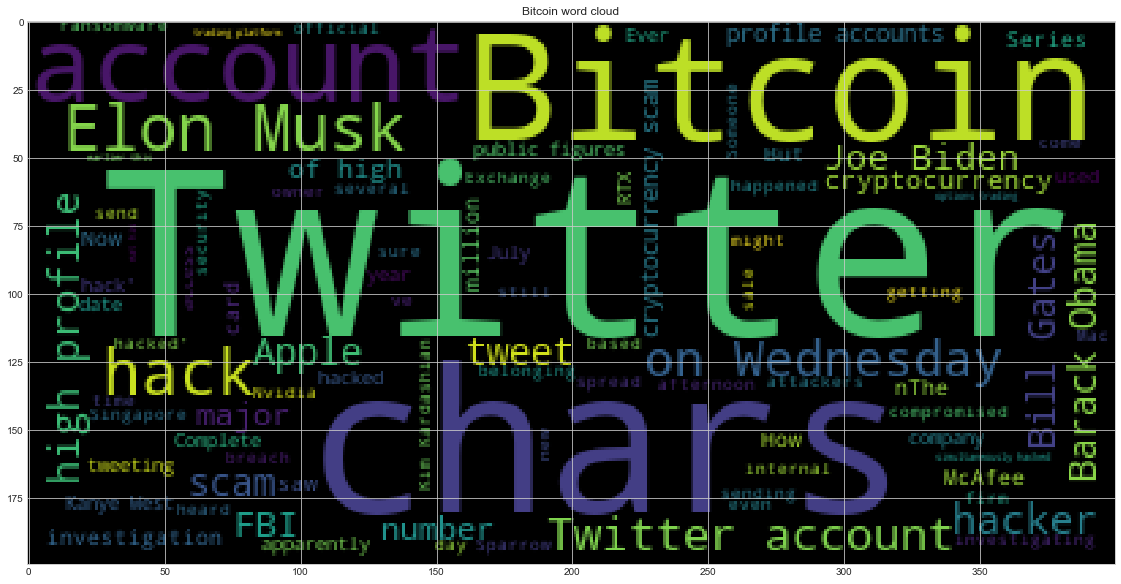

In [68]:
wc = WordCloud().generate(bitcoin_str)
plt.title("Bitcoin word cloud")
plt.imshow(wc)

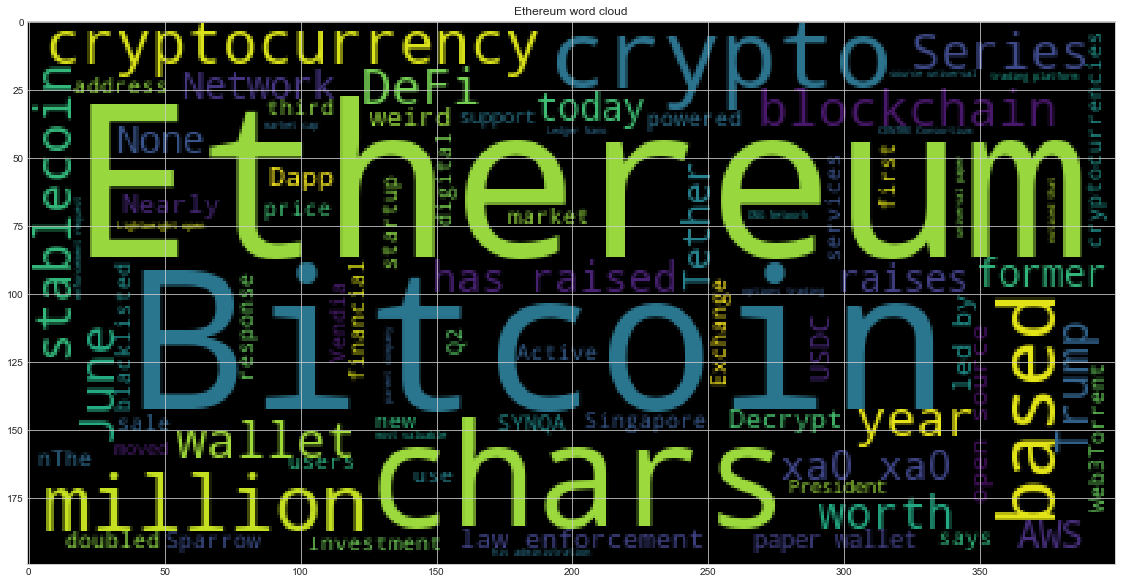

In [67]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_str)
plt.title("Ethereum word cloud")
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [53]:
import spacy
from nltk.corpus import reuters
from spacy import displacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

nlp = spacy.load("en_core_web_sm")

In [51]:
# Optional - download a language model for SpaCy
nlp= !python -m spacy download en_core_web_sm

In [49]:
# Load the spaCy model
#nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together


'Cryptocurrency exchange Binance has resumed trading activity. Users can now cancel open orders, deposit crypto assets into their Binance account, and of course buy and sell cryptocurrencies. You cant withdraw crypto assets to an external wallet just yet, but … [+1191 chars]Bitcoin is now trading at around $8,130, up a whopping 60.84 percent over the past month, with the price surging $3,086.14 over the period.\r\nThe cryptocurrency’s meteoric rise is reminiscent of its rocketing growth in the latter half of 2017, when prices reac… [+4311 chars]Binance has vowed to raise the quality of its security in the aftermath of a hack that saw thieves make off with over $40 million in Bitcoin from the exchange.\r\nThe company — which is widely believed to operate the world’s largest crypto exchange based on tra… [+2269 chars]A new payment network called Flexa is launching today that’ll let you spend cryptocurrencies in physical stores. The technology currently supports bitcoin, ether, bitcoin ca

In [63]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_str)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [64]:
# Render the visualization
displacy.render(doc, style='ent')

In [71]:
# List all Entities
[ent for ent in doc.ents]

[Twitter,
 Twitter,
 Bitcoin,
 Wednesday, July 15,
 Twitter,
 Twitter,
 Bitcoin,
 30-minute,
 7/16/2020,
 the same day,
 Latest Updates,
 Eastern,
 July 15th,
 Reuters,
 FBI,
 FBI,
 one,
 FBI,
 Twitter Bitcoin,
 FBI,
 Joe Biden,
 Elon Musk,
 Barack Obama,
 Kanye West,
 Twitter,
 FBI,
 Twitter,
 Twitter,
 Bitcoin,
 Wednesday,
 Twitter,
 Bitcoin,
 Kim Kardashian West,
 Kanye West,
 Elon Musk,
 Bill Gates,
 Barack Obama,
 FBI,
 Twitt,
 Twitter,
 FBI,
 US,
 Bitcoin,
 Twitter,
 Wednesday,
 millions,
 @rippl,
 Twitter,
 Twitter,
 Wednesday,
 millions,
 @ripple, @coindesk, @coinbase,
 @binance,
 19.21,
 June 25,
 94%,
 The Social Network,
 Mark Z,
 Learn,
 19.21,
 June 25,
 94%,
 The Social Network,
 Mark Zuckerberg,
 Facebook,
 Win,
 Twitters,
 yesterday,
 Bill Gates,
 Barack Obama,
 Appleto,
 Twitter,
 yesterday,
 Bill Gates,
 Barack Obama,
 Apple,
 BitCoin,
 Twitter,
 Bitcoin,
 Bitcoin,
 Singapore,
 today,
 $3.5 million,
 HDR Group,
 Singapore,
 Sparrow,
 $3.5 million,
 Bitcoin,
 Singapore

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [73]:
# Run the NER processor on all of the text
doc = nlp(ethereum_str)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [74]:
# Render the visualization
displacy.render(doc, style='ent')

In [75]:
# List all Entities
[ent for ent in doc.ents]

[['Sparrow Exchange,
 Bitcoin,
 Singapore,
 today,
 $3.5 million,
 HDR Group,
 Singapore,
 Sparrow,
 $3.5 million,
 Bitcoin,
 Singapore,
 today,
 $3.5 million,
 HDR Group,
 Signum C,
 The Complete Cryptocurrency Investment,
 19.21,
 June 25,
 94%,
 The Social Network,
 Mark Z,
 Learn,
 19.21,
 June 25,
 94%,
 The Social Network,
 Mark Zuckerberg,
 Facebook,
 Win,
 18,
 Adding Ethereum Micropayments,
 AWS Lambda,
 Tim Wagner,
 Shruthi Rao,
 Vendia,
 Vendia,
 $5.1M,
 AWS Lambda,
 Tim Wagner,
 Shruthi Rao,
 Vendia,
 The Celsius Network,
 DeFi,
 $10M,
 Tether,
 Robert Stevens/Decrypt,
 Robert Stevens,
 Decrypt:\nThe Celsius Network,
 DeFi,
 $10M,
 Tether\xa0,
 DeFi,
 $120 million.\xa0,
 'Report:,
 DeFi,
 97%,
 June,
 Alexander Behrens/Decrypt,
 Alexander Behrens,
 DeFi,
 97%,
 2020,
 Dapp Market Report,
 today,
 Tether,
 10bn,
 third,
 Bitcoin,
 Stablecoin Adoption',
 today,
 Tether,
 10bn,
 third,
 Bitcoin,
 Ethereum,
 USDC,
 US,
 Thailand,
 SYNQA,
 80,
 Yogita Khatri/,
 Yogita Khatri,
 S